In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [31]:
MELTS_MageMin_all=pd.read_excel('MELTS_MageMin_Liquidus.xlsx', sheet_name='Sheet1')
MELTS_MageMin=MELTS_MageMin_all.drop_duplicates(subset=['Experiment_long'])
MELTS_MageMinQuantMethod=(((MELTS_MageMin['H2O_Liq_Method']=='FTIR')|(MELTS_MageMin['H2O_Liq_Method']=='SIMS')
|(MELTS_MageMin['H2O_Liq_Method']=='Raman')|(MELTS_MageMin['H2O_Liq_Method']=='VBD_GSC')
                  ) & (MELTS_MageMin['H2O_Liq']>0))
MELTS_MageMin=MELTS_MageMin.loc[MELTS_MageMinQuantMethod]

In [32]:
sumTot=(MELTS_MageMin['SiO2_Liq']+MELTS_MageMin['TiO2_Liq']
     +MELTS_MageMin['Al2O3_Liq']+MELTS_MageMin['FeOt_Liq']
     +MELTS_MageMin['MnO_Liq']+MELTS_MageMin['MgO_Liq']
     +MELTS_MageMin['CaO_Liq']+MELTS_MageMin['Na2O_Liq']
     +MELTS_MageMin['K2O_Liq']+MELTS_MageMin['Cr2O3_Liq']+MELTS_MageMin['P2O5_Liq'])

In [33]:
sumTot.values

array([100.03      ,  99.99      , 100.04      , 100.05      ,
       100.02      , 100.03      ,  99.99      , 100.07      ,
        99.99      , 100.05      ,  99.96      ,  99.98      ,
        99.93      ,  99.98      ,  99.92      , 100.02      ,
       100.01      , 100.09      , 100.01      , 100.02      ,
       100.05      , 100.02      ,  99.97      ,  99.98      ,
        99.95      , 100.02      ,  99.96      , 100.06      ,
        99.95      , 100.02      , 100.14      ,  99.98      ,
        99.96      , 100.        ,  99.98      ,  99.93      ,
       100.        , 100.06      , 100.04      ,  99.97      ,
        99.98      ,  99.96      , 100.01      , 100.01      ,
       100.07      , 100.03      ,  99.85      ,  99.99      ,
       100.01      ,  99.98      ,  99.99      ,  99.99      ,
       100.05      , 100.06      , 100.13      , 100.08      ,
       100.01      , 100.03      , 100.        , 100.03      ,
       100.03      , 100.04      ,  99.97      ,  99.98

In [34]:
MELTS_MageMin.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Plag', 'Ol', 'Amp', 'Cpx', 'Opx',
       'Citation', 'Experiment_long', 'SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq',
       'FeOt_Liq', 'MnO_Liq', 'MgO_Liq', 'CaO_Liq', 'Na2O_Liq', 'K2O_Liq',
       'Cr2O3_Liq', 'P2O5_Liq', 'H2O_Liq', 'DeltaNNO', 'logfo2', 'T_K',
       'P_kbar', 'Experiment_P_Name', 'H2O_Liq_Method', 'N_meas_Liq',
       'T_out_MELTS', 'T_out_Holland'],
      dtype='object')

(-400.0, 200.0)

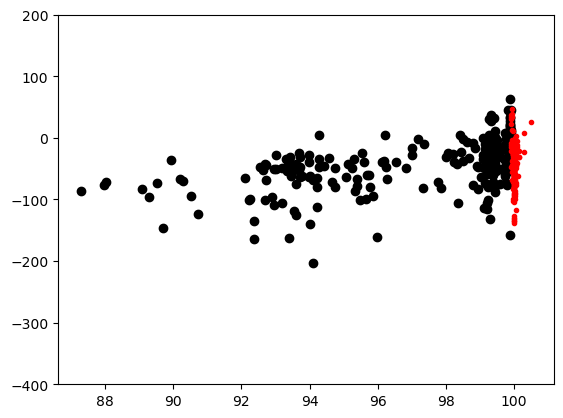

In [35]:
sumTot_anh10=~(sumTot>99.9)&(sumTot<101.1)
plt.plot(sumTot[sumTot_anh10], MELTS_MageMin['T_K'].loc[sumTot_anh10]
         -(MELTS_MageMin['T_out_MELTS'].loc[sumTot_anh10]+273.15), 'ok')

plt.plot(sumTot[~sumTot_anh10], MELTS_MageMin['T_K'].loc[~sumTot_anh10]
         -(MELTS_MageMin['T_out_MELTS'].loc[~sumTot_anh10]+273.15), '.r')
plt.ylim([-400, 200])

In [30]:
MELTS_MageMin['H2O_Liq_Method']

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Plag', 'Ol', 'Amp', 'Cpx', 'Opx',
       'Citation', 'Experiment_long', 'SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq',
       'FeOt_Liq', 'MnO_Liq', 'MgO_Liq', 'CaO_Liq', 'Na2O_Liq', 'K2O_Liq',
       'Cr2O3_Liq', 'P2O5_Liq', 'H2O_Liq', 'DeltaNNO', 'logfo2', 'T_K',
       'P_kbar', 'Experiment_P_Name', 'H2O_Liq_Method', 'N_meas_Liq',
       'T_out_MELTS', 'T_out_Holland'],
      dtype='object')

(-400.0, 200.0)

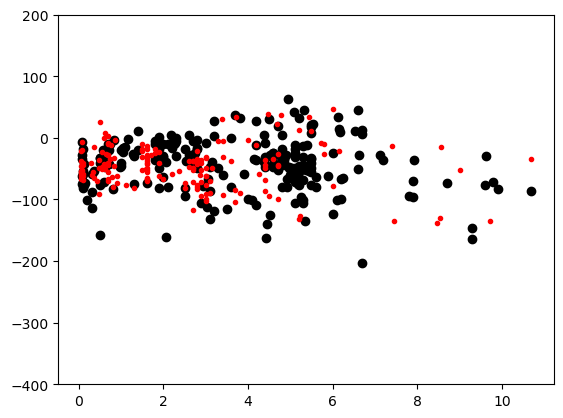

In [36]:
sumTot_anh10=~(sumTot>99.9)&(sumTot<101.1)
plt.plot(MELTS_MageMin['H2O_Liq'].loc[sumTot_anh10], MELTS_MageMin['T_K'].loc[sumTot_anh10]
         -(MELTS_MageMin['T_out_MELTS'].loc[sumTot_anh10]+273.15), 'ok')

plt.plot(MELTS_MageMin['H2O_Liq'].loc[~sumTot_anh10], MELTS_MageMin['T_K'].loc[~sumTot_anh10]
         -(MELTS_MageMin['T_out_MELTS'].loc[~sumTot_anh10]+273.15), '.r')
plt.ylim([-400, 200])

(-400.0, 200.0)

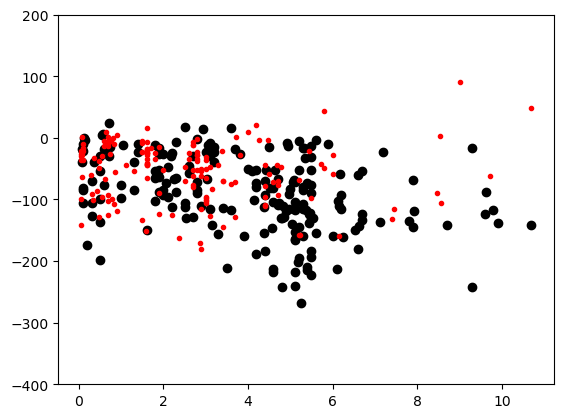

In [37]:
sumTot_anh10=~(sumTot>99.9)&(sumTot<101.1)
plt.plot(MELTS_MageMin['H2O_Liq'].loc[sumTot_anh10], MELTS_MageMin['T_K'].loc[sumTot_anh10]
         -(MELTS_MageMin['T_out_Holland'].loc[sumTot_anh10]+273.15), 'ok')

plt.plot(MELTS_MageMin['H2O_Liq'].loc[~sumTot_anh10], MELTS_MageMin['T_K'].loc[~sumTot_anh10]
         -(MELTS_MageMin['T_out_Holland'].loc[~sumTot_anh10]+273.15), '.r')
plt.ylim([-400, 200])